# ToyotaCorolla.csv : Regresión con varios algoritmos

In [18]:
# Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.feature_selection import f_regression

import joblib

%matplotlib inline
sns.set(style='whitegrid')
print("Librerías cargadas")


Librerías cargadas


## Exploración de datos


In [2]:
df = pd.read_csv("ToyotaCorolla.csv")

In [3]:
df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,0,0,0,1,0,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,1,0,0,0,1,0,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,0,1,0,1,0,0,0,0


In [4]:
# Información rápida
display(df.info())
display(df.describe(include='all').T)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Id                 1436 non-null   int64 
 1   Model              1436 non-null   object
 2   Price              1436 non-null   int64 
 3   Age_08_04          1436 non-null   int64 
 4   Mfg_Month          1436 non-null   int64 
 5   Mfg_Year           1436 non-null   int64 
 6   KM                 1436 non-null   int64 
 7   Fuel_Type          1436 non-null   object
 8   HP                 1436 non-null   int64 
 9   Met_Color          1436 non-null   int64 
 10  Color              1436 non-null   object
 11  Automatic          1436 non-null   int64 
 12  CC                 1436 non-null   int64 
 13  Doors              1436 non-null   int64 
 14  Cylinders          1436 non-null   int64 
 15  Gears              1436 non-null   int64 
 16  Quarterly_Tax      1436 non-null   int64 


None

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,1436.0,NaN,NaN,NaN,721.555014,416.47689,1.0,361.75,721.5,1081.25,1442.0
Model,1436,319,TOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-...,109,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,1436.0,NaN,NaN,NaN,10730.824513,3626.964585,4350.0,8450.0,9900.0,11950.0,32500.0
Age_08_04,1436.0,NaN,NaN,NaN,55.947075,18.599988,1.0,44.0,61.0,70.0,80.0
Mfg_Month,1436.0,NaN,NaN,NaN,5.548747,3.354085,1.0,3.0,5.0,8.0,12.0
Mfg_Year,1436.0,NaN,NaN,NaN,1999.625348,1.540722,1998.0,1998.0,1999.0,2001.0,2004.0
KM,1436.0,NaN,NaN,NaN,68533.259749,37506.448872,1.0,43000.0,63389.5,87020.75,243000.0
Fuel_Type,1436,3,Petrol,1264,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HP,1436.0,NaN,NaN,NaN,101.502089,14.98108,69.0,90.0,110.0,110.0,192.0
Met_Color,1436.0,NaN,NaN,NaN,0.674791,0.468616,0.0,0.0,1.0,1.0,1.0


In [5]:
# Normalizar nombres de columnas
df.columns = [c.strip().replace(' ', '_').replace('/', '_').replace('-', '_') for c in df.columns]
df.columns.tolist()


['Id',
 'Model',
 'Price',
 'Age_08_04',
 'Mfg_Month',
 'Mfg_Year',
 'KM',
 'Fuel_Type',
 'HP',
 'Met_Color',
 'Color',
 'Automatic',
 'CC',
 'Doors',
 'Cylinders',
 'Gears',
 'Quarterly_Tax',
 'Weight',
 'Mfr_Guarantee',
 'BOVAG_Guarantee',
 'Guarantee_Period',
 'ABS',
 'Airbag_1',
 'Airbag_2',
 'Airco',
 'Automatic_airco',
 'Boardcomputer',
 'CD_Player',
 'Central_Lock',
 'Powered_Windows',
 'Power_Steering',
 'Radio',
 'Mistlamps',
 'Sport_Model',
 'Backseat_Divider',
 'Metallic_Rim',
 'Radio_cassette',
 'Parking_Assistant',
 'Tow_Bar']

In [6]:
TARGET = 'Price'
EXCLUDE = ['Id']  # Id no se usa como feature

# Verificar target existe
if TARGET not in df.columns:
    raise ValueError(f"Columna objetivo '{TARGET}' no encontrada en el dataset")

features = [c for c in df.columns if c != TARGET and c not in EXCLUDE]
print("Features candidate:", features)
X = df[features].copy()
y = df[TARGET].copy()


Features candidate: ['Model', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM', 'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'CC', 'Doors', 'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee', 'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette', 'Parking_Assistant', 'Tow_Bar']


### Correlación

In [8]:
numeric_cols = X.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object','category']).columns.tolist()
print("Numéricas:", numeric_cols)
print("Categóricas:", cat_cols)


Numéricas: ['Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM', 'HP', 'Met_Color', 'Automatic', 'CC', 'Doors', 'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee', 'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette', 'Parking_Assistant', 'Tow_Bar']
Categóricas: ['Model', 'Fuel_Type', 'Color']


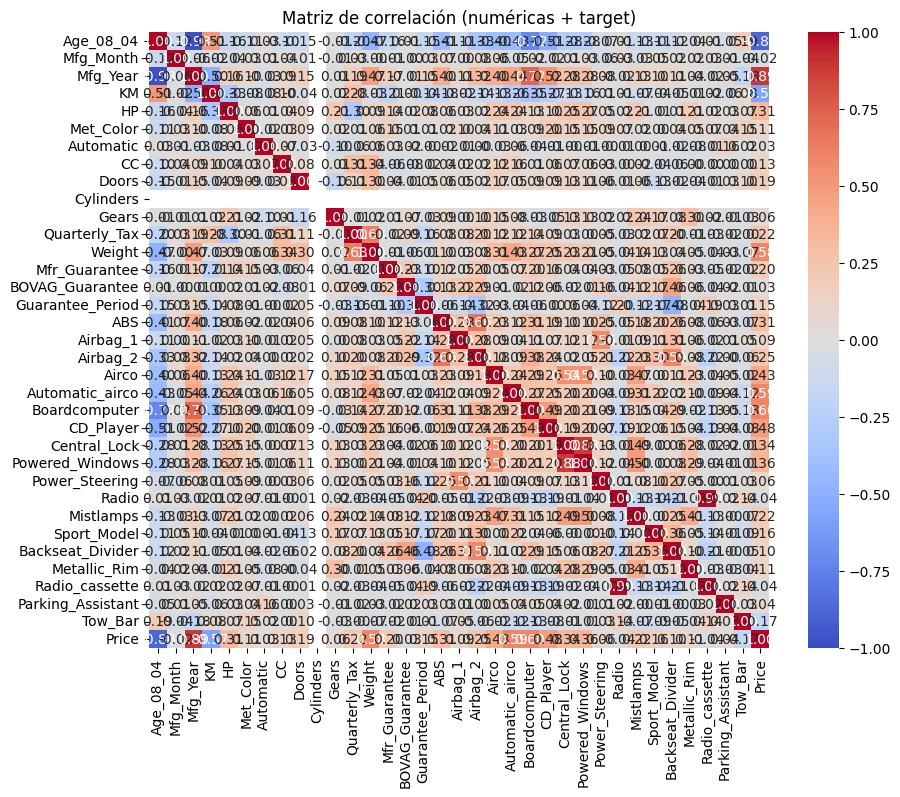

In [9]:
# Heatmap de correlaciones (solo numéricas)
plt.figure(figsize=(10,8))
num_df = df[numeric_cols + [TARGET]].copy()
corr = num_df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Matriz de correlación (numéricas + target)")
plt.show()


Text(0, 0.5, 'Precio')

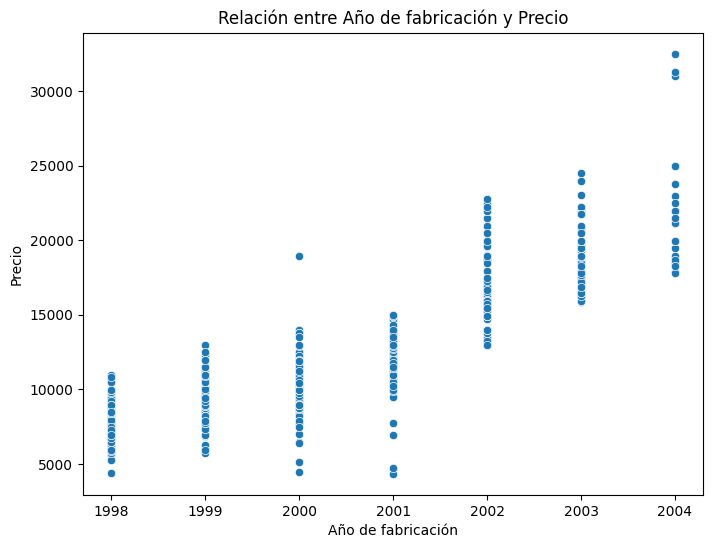

In [13]:
Year_Price = df[['Mfg_Year', TARGET]]
plt.figure(figsize=(8,6))
sns.scatterplot(data=Year_Price, x='Mfg_Year', y=TARGET)
plt.title("Relación entre Año de fabricación y Precio")
plt.xlabel("Año de fabricación")
plt.ylabel("Precio")

### División en Conjunto de entrenamiento y prueba

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train:", X_train.shape, "Test:", X_test.shape)


Train: (1148, 37) Test: (288, 37)


## Entrenamiento

### Definición de pipeline y modelos

In [21]:
# Preprocesamiento robusto
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_cols),
    ('cat', categorical_transformer, cat_cols)
], remainder='drop')


In [22]:
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(max_iter=10000),
    'ElasticNet': ElasticNet(max_iter=10000),
    'DecisionTree': DecisionTreeRegressor(random_state=42),
    'RandomForest': RandomForestRegressor(n_estimators=200, random_state=42),
    'GradientBoosting': GradientBoostingRegressor(n_estimators=200, random_state=42),
    'SVR': SVR(),
    'KNN': KNeighborsRegressor()
}


### Ejecución de pipeline

In [24]:
results = []
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    pipe = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    # Ajustar en training completo
    pipe.fit(X_train, y_train)
    # Predicción en test
    preds_test = pipe.predict(X_test)
    r2_t = r2_score(y_test, preds_test)
    mae_t = mean_absolute_error(y_test, preds_test)
    rmse_t = mean_squared_error(y_test, preds_test)
    # Validación cruzada (scoring r2 y neg_mean_absolute_error)
    # usamos cross_val_score con scoring múltiple manualmente -> obtenemos r2 mean y MAE mean via neg MAE
    cv_r2 = cross_val_score(pipe, X_train, y_train, cv=kf, scoring='r2')
    cv_mae = -cross_val_score(pipe, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')
    cv_rmse = np.sqrt(-cross_val_score(pipe, X_train, y_train, cv=kf, scoring='neg_mean_squared_error'))
    results.append({
        'model': name,
        'r2_test': r2_t,
        'mae_test': mae_t,
        'rmse_test': rmse_t,
        'r2_cv_mean': cv_r2.mean(),
        'mae_cv_mean': cv_mae.mean(),
        'rmse_cv_mean': cv_rmse.mean()
    })
    print(f"{name}: R2_test={r2_t:.4f}, MAE_test={mae_t:.2f}, RMSE_test={rmse_t:.2f} | R2_CV={cv_r2.mean():.4f}, MAE_CV={cv_mae.mean():.2f}")
    
results_df = pd.DataFrame(results).sort_values('r2_test', ascending=False).reset_index(drop=True)
results_df


LinearRegression: R2_test=0.7619, MAE_test=889.65, RMSE_test=3176323.85 | R2_CV=-9.5289, MAE_CV=1282.31
Ridge: R2_test=0.8925, MAE_test=803.07, RMSE_test=1434486.17 | R2_CV=0.8438, MAE_CV=828.60
Lasso: R2_test=0.8712, MAE_test=812.70, RMSE_test=1718751.86 | R2_CV=0.7588, MAE_CV=841.57
ElasticNet: R2_test=0.8893, MAE_test=834.59, RMSE_test=1477600.83 | R2_CV=0.8765, MAE_CV=913.92
DecisionTree: R2_test=0.8618, MAE_test=1032.92, RMSE_test=1844542.55 | R2_CV=0.8446, MAE_CV=1034.91
RandomForest: R2_test=0.9291, MAE_test=732.39, RMSE_test=945352.59 | R2_CV=0.9039, MAE_CV=790.42
GradientBoosting: R2_test=0.9358, MAE_test=709.04, RMSE_test=855943.18 | R2_CV=0.9128, MAE_CV=771.16
SVR: R2_test=-0.0251, MAE_test=2436.45, RMSE_test=13677406.92 | R2_CV=-0.0465, MAE_CV=2461.69
KNN: R2_test=0.8342, MAE_test=1036.08, RMSE_test=2212782.90 | R2_CV=0.8344, MAE_CV=1064.59


,model,r2_test,mae_test,rmse_test,r2_cv_mean,mae_cv_mean,rmse_cv_mean
0,GradientBoosting,0.935850,709.038417,8.559432e+05,0.912826,771.162606,1045.767434
1,RandomForest,0.929149,732.391892,9.453526e+05,0.903948,790.416715,1094.612281
2,Ridge,0.892490,803.066860,1.434486e+06,0.843768,828.595377,1350.496239
3,ElasticNet,0.889258,834.592363,1.477601e+06,0.876522,913.923387,1258.110393
4,Lasso,0.871185,812.698691,1.718752e+06,0.758840,841.569096,1565.904000
5,DecisionTree,0.861757,1032.916667,1.844543e+06,0.844640,1034.912694,1385.725423
6,KNN,0.834159,1036.081944,2.212783e+06,0.834418,1064.586036,1455.665838
7,LinearRegression,0.761945,889.654937,3.176324e+06,-9.528867,1282.314169,6521.669916
8,SVR,-0.025079,2436.453124,1.367741e+07,-0.046497,2461.691548,3684.807668


### Visualización de resultados

,model,r2_test,mae_test,rmse_test,r2_cv_mean,mae_cv_mean,rmse_cv_mean
0,GradientBoosting,0.935850,709.038417,8.559432e+05,0.912826,771.162606,1045.767434
1,RandomForest,0.929149,732.391892,9.453526e+05,0.903948,790.416715,1094.612281
2,Ridge,0.892490,803.066860,1.434486e+06,0.843768,828.595377,1350.496239
3,ElasticNet,0.889258,834.592363,1.477601e+06,0.876522,913.923387,1258.110393
4,Lasso,0.871185,812.698691,1.718752e+06,0.758840,841.569096,1565.904000
5,DecisionTree,0.861757,1032.916667,1.844543e+06,0.844640,1034.912694,1385.725423
6,KNN,0.834159,1036.081944,2.212783e+06,0.834418,1064.586036,1455.665838
7,LinearRegression,0.761945,889.654937,3.176324e+06,-9.528867,1282.314169,6521.669916
8,SVR,-0.025079,2436.453124,1.367741e+07,-0.046497,2461.691548,3684.807668


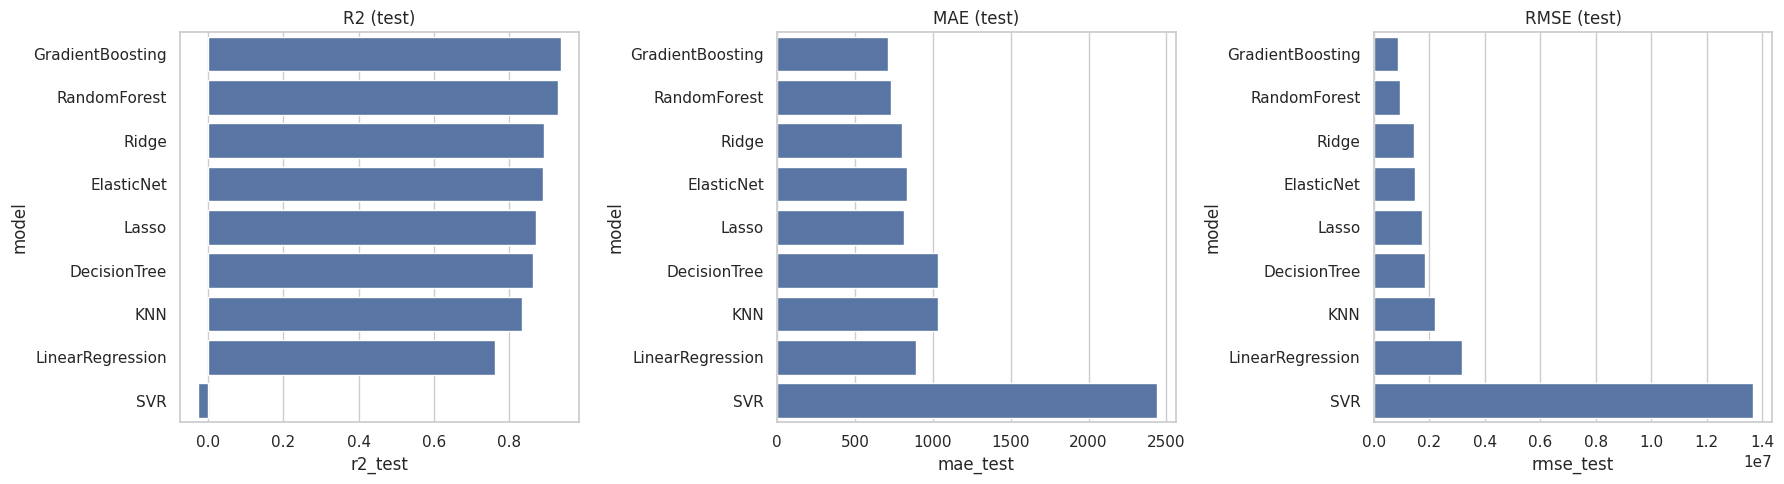

In [25]:
# Mostrar tabla ordenada
display(results_df)

# Plots comparativos (R2, MAE, RMSE test)
fig, axs = plt.subplots(1,3, figsize=(18,5))
sns.barplot(x='r2_test', y='model', data=results_df, ax=axs[0])
axs[0].set_title('R2 (test)')
sns.barplot(x='mae_test', y='model', data=results_df, ax=axs[1])
axs[1].set_title('MAE (test)')
sns.barplot(x='rmse_test', y='model', data=results_df, ax=axs[2])
axs[2].set_title('RMSE (test)')
plt.tight_layout()
plt.show()


### Identificación de mejor modelo

In [27]:
best_model_name = results_df.loc[0, 'model']
print("Mejor modelo (por R2_test):", best_model_name)

best_model = models[best_model_name]
best_pipe = Pipeline(steps=[('preprocessor', preprocessor), ('model', best_model)])
best_pipe.fit(X_train, y_train)


Mejor modelo (por R2_test): GradientBoosting


,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
